<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_ImageProcessingTF/blob/main/IG_FoodClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

os.environ["KAGGLE_USERNAME"] = "ravikanttyagi"
os.environ["KAGGLE_KEY"] = "095a21c789eb4728fde2b29230033273"

!kaggle datasets download utkarshsaxenadn/fast-food-classification-dataset

100% 818M/821M [00:29<00:00, 30.4MB/s]
100% 821M/821M [00:29<00:00, 29.6MB/s]


In [2]:
from IPython.display import clear_output

!unzip fast-food-classification-dataset.zip

clear_output()

In [1]:
%load_ext tensorboard

In [2]:
train_dir = "Fast Food Classification V2/Train"
test_dir = "Fast Food Classification V2/Test"
val_dir = "Fast Food Classification V2/Valid"

In [8]:
import cv2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

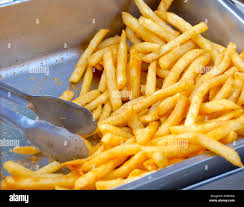

In [9]:
img_path = "Fast Food Classification V2/Train/Fries/Fries-Train (1).jpeg"
Image.open(img_path)

In [10]:
img = cv2.imread(img_path)

In [11]:
img.shape

(207, 244, 3)

In [12]:
class_names = os.listdir(train_dir)

In [13]:
class_names

['Fries',
 'Taco',
 'Baked Potato',
 'Pizza',
 'Crispy Chicken',
 'Taquito',
 'Sandwich',
 'Burger',
 'Hot Dog',
 'Donut']

In [14]:
image_data_gen = ImageDataGenerator(rescale=1/255.,
                                    horizontal_flip=True)

X_train = image_data_gen.flow_from_directory(train_dir, target_size=(227,227),
                                             batch_size=32, class_mode="sparse")

X_val = image_data_gen.flow_from_directory(val_dir, target_size=(227,227),
                                             batch_size=32, class_mode="sparse")

X_test = image_data_gen.flow_from_directory(test_dir, target_size=(227,227),
                                             batch_size=32, class_mode="sparse")

Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.


In [15]:
# Build AlexNet Model

model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=4, activation="relu", input_shape=(227,227,3)))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=1, padding="same", activation="relu"))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=1, padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [17]:
from tensorflow.python.ops import histogram_ops
from datetime import datetime as dt
def train_model():
  model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

  logdir = os.path.join("logs", dt.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  model.fit(X_train, validation_data=X_val, epochs=10, callbacks=[tensorboard_callback])

In [ ]:
train_model()

Epoch 1/10
 88/469 [====>.........................] - ETA: 49s - loss: 2.5296 - accuracy: 0.0920

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


469/469 [==============================] - ETA: 0s - loss: 2.3459 - accuracy: 0.0961